In [1]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df = pd.read_excel("C:/Users/12965/Downloads/Delhi_Pollution_data (2).csv")

In [3]:
#Check the first few observations
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate


In [4]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      2009 non-null   float64       
 14  AQI         2009 non-null   int64         
 15  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), fl

In [6]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [7]:
#Check for presence of missing values in each feature
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [8]:
#Note: AQI and AQI_Bucket are dependent features
#Drop all columns other than the ones suitable for PCA
df_num = df.drop(['City', 'Date', 'AQI', 'AQI_Bucket'], axis = 1)

In [9]:
#Dataframe suitable for PCA
df_num.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43


In [10]:
#Check the number of features
print(len(df_num.columns))
df_num.columns

12


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

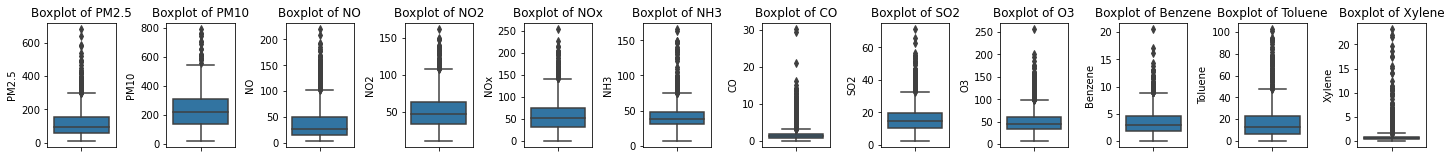

In [11]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5 ,len(df_num.columns), i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [12]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [13]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

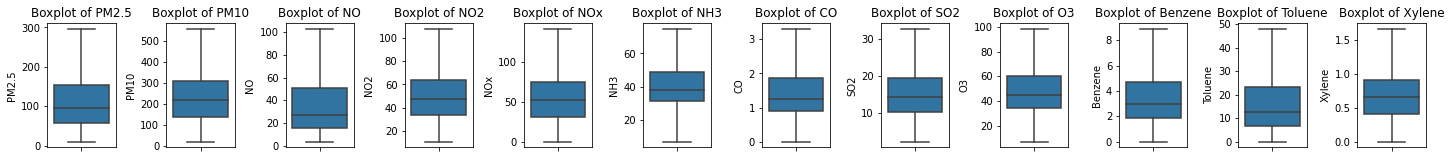

In [14]:
#Check to verify if outliers have been treated
plt.figure(figsize = (20,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5 ,len(df_num.columns), i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
#Check the descriptive stats to observe scale issues between the variables
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,2009.0,114.304358,73.207550,10.24,57.10,94.62,152.99,296.825
PM10,2009.0,231.283146,116.454530,18.59,138.81,216.73,307.38,560.235
NO,2009.0,37.080572,27.868734,3.57,15.90,27.20,50.72,102.950
NO2,2009.0,50.418793,21.533088,10.63,33.90,47.15,63.57,108.075
NOx,2009.0,57.594064,34.831204,0.00,31.15,52.75,75.36,141.675
NH3,2009.0,41.004778,13.629083,6.78,31.22,38.04,48.68,74.870
CO,2009.0,1.457427,0.856552,0.00,0.91,1.24,1.87,3.310
SO2,2009.0,15.465983,6.480297,2.34,10.46,14.45,19.36,32.710
O3,2009.0,49.570667,20.892250,6.94,34.08,44.44,59.88,98.580
Benzene,2009.0,3.480214,2.228740,0.00,1.87,2.96,4.68,8.895


In [16]:
#Scale the data
from scipy.stats import zscore
df_num_scaled = df_num.apply(zscore)

In [17]:
#Check the data post scaling
df_num_scaled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.823814,-0.881449,-1.103682,-1.364231,-1.171197,-0.876637,-0.569198,-0.666182,-0.949903,-0.650850,0.571394,-0.164550
1,-1.017968,-1.196500,-1.115885,-1.507767,-1.210540,-0.919203,-0.721007,-0.764968,-0.587956,-0.857296,0.000887,-0.470643
2,-0.948832,-0.405093,-0.954015,-1.340076,-1.023879,-0.956633,-0.674297,-0.599811,-1.099278,-0.605970,0.589619,0.753730
3,-0.748529,0.664518,-0.876131,-1.338682,-0.968742,-0.861224,-0.604231,-0.735641,-1.509101,-0.794465,0.695004,1.767664
4,-1.017968,-0.647136,-0.940376,-1.345186,-1.008659,-0.702700,-0.685974,-0.785033,-1.469363,-0.803441,0.287725,-0.585428


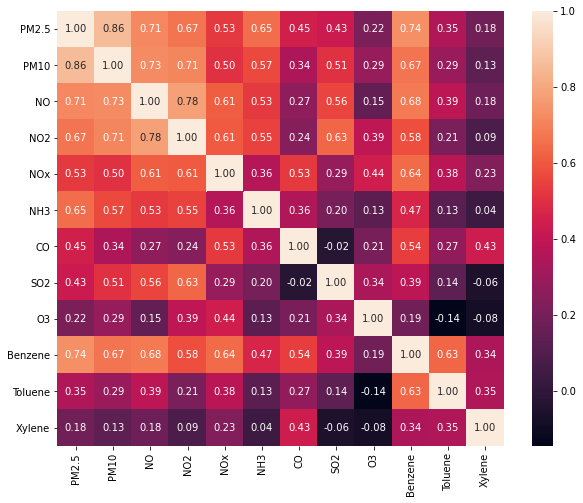

In [18]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df_num_scaled.corr(), annot=True,fmt='.2f');

In [25]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
#p_value

In [26]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
#from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_all,kmo_model=calculate_kmo(df_num_scaled)
#kmo_model

In [51]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
df_num_scaled_transformed = pd.DataFrame(pca.fit_transform(df_num_scaled))

In [37]:
#Extract eigen vectors
pca.components_

array([[ 0.36757983,  0.35874864,  0.3586897 ,  0.34856375,  0.31661476,
         0.27264851,  0.22407402,  0.2354441 ,  0.14900296,  0.35967138,
         0.20036925,  0.11870582],
       [ 0.01788055,  0.12180783,  0.07920562,  0.25502423, -0.07185109,
         0.06976372, -0.37463646,  0.38778796,  0.33653904, -0.20718676,
        -0.41848144, -0.53052722],
       [-0.10244197, -0.1082965 , -0.23877719, -0.02680145,  0.329494  ,
        -0.04259609,  0.46126311, -0.1934286 ,  0.65938621, -0.06805854,
        -0.32861601,  0.10988637],
       [ 0.2517615 ,  0.14172243, -0.04998115, -0.05800976, -0.19614686,
         0.64557842,  0.21025355, -0.42214395, -0.25004424, -0.10221822,
        -0.35987447, -0.17472887],
       [-0.02951417, -0.10587218, -0.06664532, -0.15232101,  0.3156141 ,
         0.03492092,  0.00652305, -0.27840717,  0.07088788,  0.1881715 ,
         0.44708658, -0.73591565],
       [-0.33778676, -0.35252369,  0.38787525,  0.34686121,  0.49700404,
         0.18451077, -

In [38]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.71418983, 1.73516949, 1.14758734, 0.95455182, 0.63944041,
       0.46998204, 0.36503474, 0.34686872, 0.1906889 , 0.16883957,
       0.15442402, 0.11919921])

In [39]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.47594546, 0.14452548, 0.09558468, 0.07950639, 0.05326018,
       0.03914568, 0.03040442, 0.02889134, 0.01588283, 0.01406296,
       0.01286226, 0.00992832])

In [40]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                     index = df_num_scaled_transformed.columns)

In [41]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.367580,0.017881,-0.102442,0.251761,-0.029514,-0.337787,0.065633,0.275665,0.086309,-0.123236,-0.164356,0.738761
1,0.358749,0.121808,-0.108297,0.141722,-0.105872,-0.352524,0.123756,0.469464,-0.192561,-0.218866,0.015977,-0.606809
2,0.358690,0.079206,-0.238777,-0.049981,-0.066645,0.387875,-0.144580,0.198196,0.126583,0.155804,0.736009,0.092056
3,0.348564,0.255024,-0.026801,-0.058010,-0.152321,0.346861,0.022629,-0.052348,-0.576914,0.421731,-0.385366,0.058499
4,0.316615,-0.071851,0.329494,-0.196147,0.315614,0.497004,-0.093880,0.218380,0.227118,-0.446437,-0.302527,-0.044863
5,0.272649,0.069764,-0.042596,0.645578,0.034921,0.184511,0.277003,-0.566976,0.115428,-0.193869,0.039794,-0.127519
6,0.224074,-0.374636,0.461263,0.210254,0.006523,-0.203209,-0.607033,-0.152714,-0.298226,0.032584,0.170692,-0.013601
7,0.235444,0.387788,-0.193429,-0.422144,-0.278407,-0.223017,-0.365280,-0.437689,0.135554,-0.322230,-0.063257,-0.010476
8,0.149003,0.336539,0.659386,-0.250044,0.070888,-0.218104,0.448666,-0.101397,-0.002582,0.103173,0.293715,0.078303
9,0.359671,-0.207187,-0.068059,-0.102218,0.188172,-0.207380,-0.020012,-0.090417,0.531238,0.589204,-0.224580,-0.214074


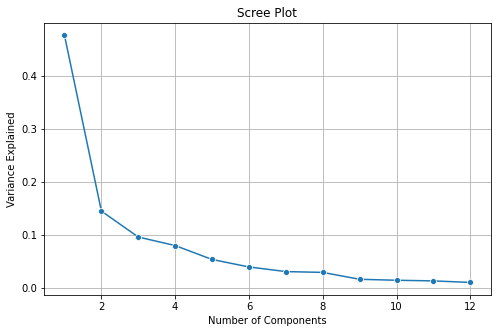

In [42]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [43]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.47594546, 0.62047094, 0.71605562, 0.79556201, 0.84882219,
       0.88796786, 0.91837228, 0.94726362, 0.96314645, 0.97720941,
       0.99007168, 1.        ])

In [44]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [45]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
0,0.367580,0.017881,-0.102442,0.251761,-0.029514
1,0.358749,0.121808,-0.108297,0.141722,-0.105872
2,0.358690,0.079206,-0.238777,-0.049981,-0.066645
3,0.348564,0.255024,-0.026801,-0.058010,-0.152321
4,0.316615,-0.071851,0.329494,-0.196147,0.315614
5,0.272649,0.069764,-0.042596,0.645578,0.034921
6,0.224074,-0.374636,0.461263,0.210254,0.006523
7,0.235444,0.387788,-0.193429,-0.422144,-0.278407
8,0.149003,0.336539,0.659386,-0.250044,0.070888
9,0.359671,-0.207187,-0.068059,-0.102218,0.188172


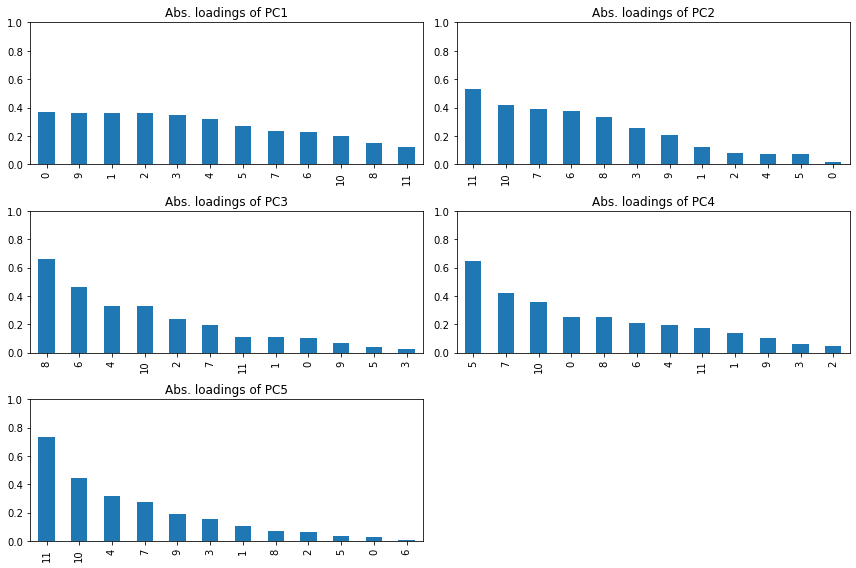

In [46]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

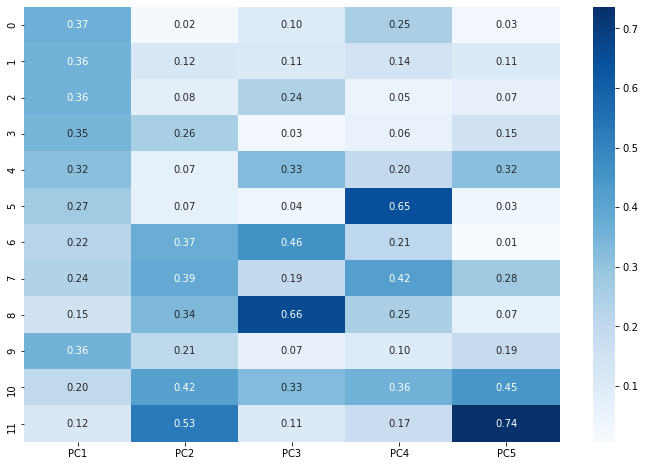

In [47]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [48]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5
0,0.367580,0.017881,-0.102442,0.251761,-0.029514
1,0.358749,0.121808,-0.108297,0.141722,-0.105872
2,0.358690,0.079206,-0.238777,-0.049981,-0.066645
3,0.348564,0.255024,-0.026801,-0.058010,-0.152321
4,0.316615,-0.071851,0.329494,-0.196147,0.315614
5,0.272649,0.069764,-0.042596,0.645578,0.034921
6,0.224074,-0.374636,0.461263,0.210254,0.006523
7,0.235444,0.387788,-0.193429,-0.422144,-0.278407
8,0.149003,0.336539,0.659386,-0.250044,0.070888
9,0.359671,-0.207187,-0.068059,-0.102218,0.188172


In [52]:
#...and we need the original scaled features
df_num_scaled_transformed.iloc[0]

0    -2.665334
1    -0.916180
2    -0.790212
3    -0.245518
4     0.367239
5    -0.539852
6     0.118823
7    -0.145269
8    -0.116631
9    -0.127163
10    0.049361
11    0.022187
Name: 0, dtype: float64

In [55]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_num_scaled_transformed.iloc[0])
    print(round(pc_score, 6), end = ' ')

-1.766506 -0.494687 0.712399 -1.060855 0.377542 

In [57]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_num_scaled_transformed)

In [58]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-2.665334,-0.916180,-0.790212,-0.245518,0.367239
1,-3.156439,-0.411456,-0.384953,-0.150697,0.398613
2,-2.354841,-1.347799,-0.881378,-0.483265,-0.338393
3,-1.829266,-1.964523,-1.144289,-0.255720,-1.167517
4,-2.781773,-0.676409,-1.105102,0.156680,0.541447
5,-2.552951,-1.016836,-0.896148,-0.122146,0.308240
6,-2.974647,-0.688794,-0.713432,-0.076641,0.467709
7,-3.461293,-0.243401,-0.666444,0.260655,0.516457
8,-3.394853,-0.254105,-0.564833,0.252188,0.474779
9,-2.949465,-0.223915,-0.256325,-0.014562,0.662630


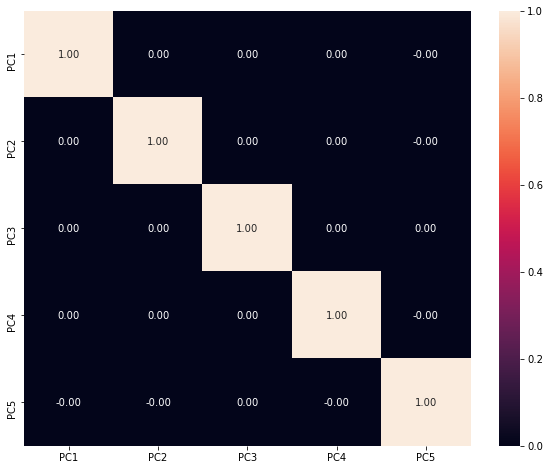

In [59]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');